In [86]:
%reload_ext tensorboard
%tensorboard --logdir logs --port 8082

Reusing TensorBoard on port 8082 (pid 100206), started 12:55:22 ago. (Use '!kill 100206' to kill it.)

In [4]:
!pip install tensorflow numpy matplotlib

     |████████████████████████████████| 458.3 MB 26 kB/s  eta 0:00:01
     |████████████████████████████████| 5.8 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 299 kB/s eta 0:00:01
     |████████████████████████████████| 462 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 57 kB 3.3 MB/s eta 0:00:01
  Using cached numpy-1.19.5-cp36-cp36m-manylinux2010_x86_64.whl (14.8 MB)
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30692 sha256=a33072c14cdc5aa492562fe0c57174a4ca17cae91aafe115eefe563d5895dc06
  Stored in directory: /home/joso/.cache/pip/wheels/22/4c/94/0583f60c9c5b6024ed64f290cb2d43b06bb4f75577dc3c93a7
  Created wheel for wrapt: filename=wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl size=67548 sha256=2f5cff6f451e8c978b496e3abe8306e4a4273721511bee44fbb506ed98f90630
  Stored in directory: /home/jos

      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.1 requires torch==1.9.1, but you have torch 1.6.0 which is incompatible.
You should consider upgrading via the '/home/joso/gc-net/env/bin/python3 -m pip install --upgrade pip' command.


In [22]:
import glob
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tf.disable_v2_behavior()

%matplotlib inline

def get_section_results(exp):
    """
        requires tensorflow==1.12.0
    """
    t = []
    eval_return = []
    root = "logs/"
    file = glob.glob("{}*{}*/events*".format(root, exp))[0]
    print(file)
    for e in tf.train.summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'return/test':
                t.append(e.step)
                eval_return.append(v.simple_value)
                
    return t, eval_return

In [24]:
t, eval_return = get_section_results("cartpole-swingup/sac/seed0-20211101-1110/summary")
print(t, eval_return)

logs/cartpole-swingup/sac/seed0-20211101-1110/summary/events.out.tfevents.1635790214.pabamd3.36541.0
[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000] [19.096332550048828, 258.055908203125, 311.99505615234375, 434.47637939453125, 821.0736694335938, 797.7868041992188, 810.7479248046875, 811.2200317382812, 782.3648071289062, 781.2898559570312]


logs/cartpole-balance/sac/seed0-20211101-1235/summary/events.out.tfevents.1635795309.pabamd3.217498.0
logs/cartpole-balance/sac/seed0-20211101-1110/summary/events.out.tfevents.1635790236.pabamd3.37758.0


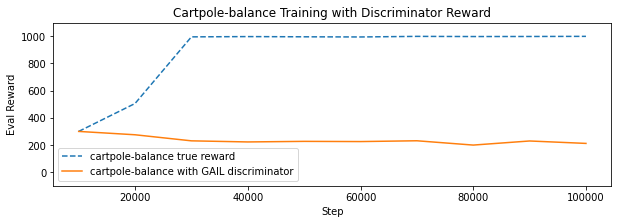

In [111]:
cb_reward_transfer_t, cb_reward_transfer_eval = get_section_results("cartpole-balance/sac/seed0-20211101-1235/summary")
cb_t, cb_eval = get_section_results("cartpole-balance/sac/seed0-20211101-1110/summary")
plt.figure(figsize=(10,3))
plt.plot(cb_t, cb_eval, '--', label="cartpole-balance true reward")
plt.plot(cb_reward_transfer_t, cb_reward_transfer_eval, label="cartpole-balance with GAIL discriminator")
plt.title("Cartpole-balance Training with Discriminator Reward")
plt.xlabel("Step")
plt.ylabel("Eval Reward")
ax = plt.gca()
ax.set_ylim([-100, 1100])

plt.legend()

In [30]:
cs_true_t, cs_true_rew = get_section_results("cartpole-swingup/sac/seed0-20211101-1110/summary")
cb_true_t, cb_true_rew = get_section_results("cartpole-balance/sac/seed0-20211101-1110/summary")

logs/cartpole-swingup/sac/seed0-20211101-1110/summary/events.out.tfevents.1635790214.pabamd3.36541.0
logs/cartpole-balance/sac/seed0-20211101-1110/summary/events.out.tfevents.1635790236.pabamd3.37758.0


logs/cartpole-swingup/gail/seed0-20211101-1150/summary/events.out.tfevents.1635792632.pabamd3.120101.0
logs/cartpole-swingup/airl/seed0-20211101-1334/summary/events.out.tfevents.1635798840.pabamd3.76396.0


(-0.1, 1.1)

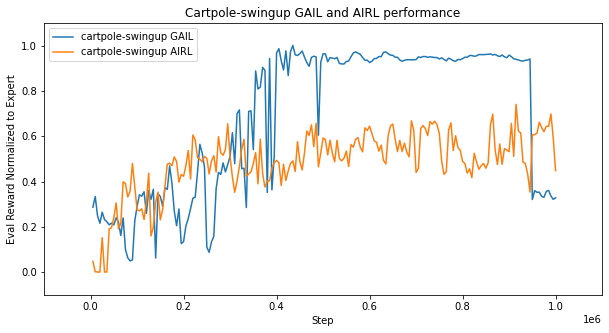

In [84]:
cs_gail_t, cs_gail_rew = get_section_results("cartpole-swingup/gail/seed0-20211101-1150/summary")
cs_gail_rew = [i / max(cs_true_rew) for i in cs_gail_rew]
cs_airl_t, cs_airl_rew = get_section_results("cartpole-swingup/airl/seed0-20211101-1334/summary")
cs_airl_rew = [i / max(cs_true_rew) for i in cs_airl_rew]
plt.figure(figsize=(10,3))
plt.plot(cs_gail_t, cs_gail_rew, label="cartpole-swingup GAIL")
plt.plot(cs_airl_t, cs_airl_rew, label="cartpole-swingup AIRL")
plt.title("Cartpole-swingup GAIL and AIRL performance")
plt.xlabel("Step")
plt.ylabel("Eval Reward Normalized to Expert")
plt.legend()
ax = plt.gca()
ax.set_xlim([-100000, 1100000])
ax.set_ylim([-.1, 1.1])

logs/cartpole-balance/gail/seed0-20211101-1150/summary/events.out.tfevents.1635792607.pabamd3.118591.0
logs/cartpole-balance/airl/seed0-20211101-1333/summary/events.out.tfevents.1635798825.pabamd3.75364.0


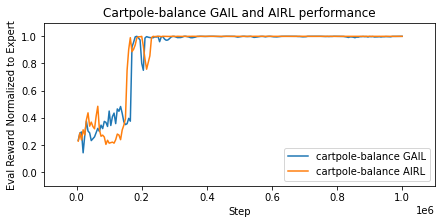

In [112]:
cb_gail_t, cb_gail_rew = get_section_results("cartpole-balance/gail/seed0-20211101-1150/summary")
cb_gail_rew = [i / max(cb_true_rew) for i in cb_gail_rew]
cb_airl_t, cb_airl_rew = get_section_results("cartpole-balance/airl/seed0-20211101-1333/summary")
cb_airl_rew = [i / max(cb_true_rew) for i in cb_airl_rew]
plt.figure(figsize=(7,3))
plt.plot(cb_gail_t, cb_gail_rew, label="cartpole-balance GAIL")
plt.plot(cb_airl_t, cb_airl_rew, label="cartpole-balance AIRL")
plt.title("Cartpole-balance GAIL and AIRL performance")
plt.xlabel("Step")
plt.ylabel("Eval Reward Normalized to Expert")
ax = plt.gca()
ax.set_xlim([-100000, 1100000])
ax.set_ylim([-.1, 1.1])

plt.legend()

logs/cartpole-swingup/gail/seed0-20211101-2357/summary/events.out.tfevents.1635836222.pabamd3.13860.0
logs/cartpole-swingup/airl/seed0-20211101-2358/summary/events.out.tfevents.1635836315.pabamd3.22847.0
logs/cartpole-swingup/gail/seed1-20211102-1121/summary/events.out.tfevents.1635877273.pabamd3.27931.0
logs/cartpole-swingup/airl/seed1-20211102-1120/summary/events.out.tfevents.1635877259.pabamd3.26150.0
logs/cartpole-swingup/gail/seed2-20211102-1148/summary/events.out.tfevents.1635878895.pabamd3.190575.0
logs/cartpole-swingup/airl/seed2-20211102-1148/summary/events.out.tfevents.1635878881.pabamd3.188909.0


/home/joso/gc-net/env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


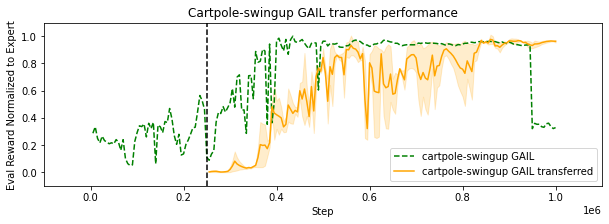

In [116]:
cs_gail_trans_t1, cs_gail_trans_rew1 = get_section_results("cartpole-swingup/gail/seed0-20211101-2357/summary")
cs_airl_trans_t1, cs_airl_trans_rew1 = get_section_results("cartpole-swingup/airl/seed0-20211101-2358/summary")
cs_gail_trans_t1 = [250000 + t for t in cs_gail_trans_t1]
cs_airl_trans_t1 = [250000 + t for t in cs_airl_trans_t1]
cs_gail_trans_rew1 = [i / max(cs_true_rew) for i in cs_gail_trans_rew1]
cs_airl_trans_rew1 = [i / max(cs_true_rew) for i in cs_airl_trans_rew1]

cs_gail_trans_t2, cs_gail_trans_rew2 = get_section_results("cartpole-swingup/gail/seed1-20211102-1121/summary")
cs_airl_trans_t2, cs_airl_trans_rew2 = get_section_results("cartpole-swingup/airl/seed1-20211102-1120/summary")
cs_gail_trans_t2 = [250000 + t for t in cs_gail_trans_t2]
cs_airl_trans_t2 = [250000 + t for t in cs_airl_trans_t2]
cs_gail_trans_rew2 = [i / max(cs_true_rew) for i in cs_gail_trans_rew2]
cs_airl_trans_rew2 = [i / max(cs_true_rew) for i in cs_airl_trans_rew2]

cs_gail_trans_t3, cs_gail_trans_rew3 = get_section_results("cartpole-swingup/gail/seed2-20211102-1148/summary")
cs_airl_trans_t3, cs_airl_trans_rew3 = get_section_results("cartpole-swingup/airl/seed2-20211102-1148/summary")
cs_gail_trans_t3 = [250000 + t for t in cs_gail_trans_t3]
cs_airl_trans_t3 = [250000 + t for t in cs_airl_trans_t3]
cs_gail_trans_rew3 = [i / max(cs_true_rew) for i in cs_gail_trans_rew3]
cs_airl_trans_rew3 = [i / max(cs_true_rew) for i in cs_airl_trans_rew3]

plt.figure(figsize=(10,3))
plt.plot(cs_gail_t, cs_gail_rew, '--', label="cartpole-swingup GAIL", color="green")
sns.lineplot(cs_gail_trans_t1 + cs_gail_trans_t3, cs_gail_trans_rew1 + cs_gail_trans_rew3, label="cartpole-swingup GAIL transferred", color="orange")
plt.title("Cartpole-swingup GAIL transfer performance")
plt.xlabel("Step")
plt.ylabel("Eval Reward Normalized to Expert")
plt.plot([250000] * 2, [-.1, 1.1], '--', color='black')
ax = plt.gca()
ax.set_xlim([-100000, 1100000])
ax.set_ylim([-.1, 1.1])
plt.legend()

/home/joso/gc-net/env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


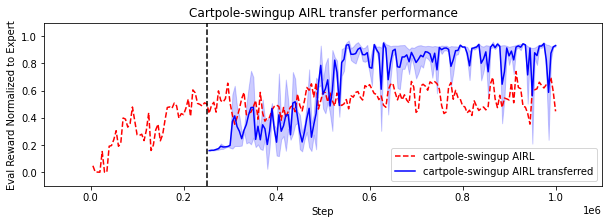

In [115]:
plt.figure(figsize=(10,3))
plt.plot(cs_airl_t, cs_airl_rew, '--', label="cartpole-swingup AIRL", color="red")
sns.lineplot(cs_airl_trans_t1 + cs_airl_trans_t3, cs_airl_trans_rew1 + cs_airl_trans_rew3, label="cartpole-swingup AIRL transferred", color="blue")
plt.plot([250000] * 2, [-.1, 1.1], '--', color='black')
plt.title("Cartpole-swingup AIRL transfer performance")
plt.xlabel("Step")
plt.ylabel("Eval Reward Normalized to Expert")
ax = plt.gca()
ax.set_xlim([-100000, 1100000])
ax.set_ylim([-.1, 1.1])
plt.legend()

/home/joso/gc-net/env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/joso/gc-net/env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


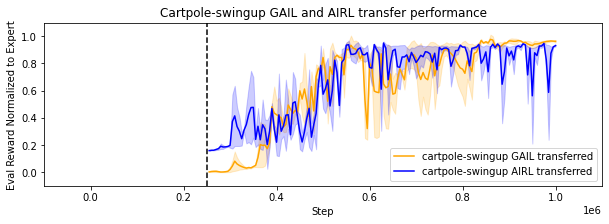

In [114]:
plt.figure(figsize=(10,3))
sns.lineplot(cs_gail_trans_t1 + cs_gail_trans_t3, cs_gail_trans_rew1 + cs_gail_trans_rew3, label="cartpole-swingup GAIL transferred", color="orange")
sns.lineplot(cs_airl_trans_t1 + cs_airl_trans_t3, cs_airl_trans_rew1 + cs_airl_trans_rew3, label="cartpole-swingup AIRL transferred", color="blue")
plt.plot([250000] * 2, [-.1, 1.1], '--', color='black')
plt.title("Cartpole-swingup GAIL and AIRL transfer performance")
plt.xlabel("Step")
plt.ylabel("Eval Reward Normalized to Expert")
ax = plt.gca()
ax.set_xlim([-100000, 1100000])
ax.set_ylim([-.1, 1.1])
plt.legend()

In [88]:
qw_true_t, qw_true_rew = get_section_results("quadruped-walk/sac/seed0-20211029-0024/seed0-20211029-0024/summary")

fs_true_t, fs_true_rew = get_section_results("finger-spin/sac/seed0-20211031-1935/summary")

ww_true_t, ww_true_rew = get_section_results("walker-walk/sac/seed0-20211030-2324/summary")


logs/quadruped-walk/sac/seed0-20211029-0024/seed0-20211029-0024/summary/events.out.tfevents.1635492269.pabamd3.185799.0
logs/finger-spin/sac/seed0-20211031-1935/summary/events.out.tfevents.1635734153.pabamd3.217955.0
logs/walker-walk/sac/seed0-20211030-2324/summary/events.out.tfevents.1635661464.pabamd3.21079.0


logs/quadruped-walk/airl/seed0-20211030-1423/summary/events.out.tfevents.1635629037.pabamd3.218976.0
logs/quadruped-walk/gail/seed0-20211029-2357/summary/events.out.tfevents.1635577074.pabamd3.203844.0


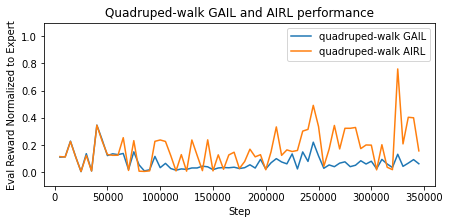

In [107]:
qw_airl_t, qw_airl_rew = get_section_results("quadruped-walk/airl/seed0-20211030-1423/summary")
qw_airl_rew = [i / max(qw_true_rew) for i in qw_airl_rew]
qw_gail_t, qw_gail_rew = get_section_results("quadruped-walk/gail/seed0-20211029-2357/summary")
qw_gail_t = qw_gail_t[:len(qw_airl_t)]
qw_gail_rew = qw_gail_rew[:len(qw_airl_rew)]
qw_gail_rew = [i / max(qw_true_rew) for i in qw_gail_rew]

plt.figure(figsize=(7,3))
plt.plot(qw_gail_t, qw_gail_rew, label="quadruped-walk GAIL")
plt.plot(qw_airl_t, qw_airl_rew, label="quadruped-walk AIRL")
plt.title("Quadruped-walk GAIL and AIRL performance")
plt.xlabel("Step")
plt.ylabel("Eval Reward Normalized to Expert")
ax = plt.gca()
ax.set_xlim([-10000, 360000])
ax.set_ylim([-.1, 1.1])

plt.legend()

logs/finger-spin/airl/seed0-20211031-2250/summary/events.out.tfevents.1635745828.pabamd3.115467.0
logs/finger-spin/gail/seed0-20211031-1905/summary/events.out.tfevents.1635732354.pabamd3.151152.0


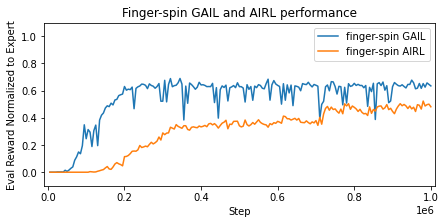

In [108]:
fs_airl_t, fs_airl_rew = get_section_results("finger-spin/airl/seed0-20211031-2250/summary")
fs_airl_rew = [i / max(fs_true_rew) for i in fs_airl_rew]
fs_gail_t, fs_gail_rew = get_section_results("finger-spin/gail/seed0-20211031-1905/summary")
fs_gail_rew = [i / max(fs_true_rew) for i in fs_gail_rew]

plt.figure(figsize=(7,3))
plt.plot(fs_gail_t, fs_gail_rew, label="finger-spin GAIL")
plt.plot(fs_airl_t, fs_airl_rew, label="finger-spin AIRL")
plt.title("Finger-spin GAIL and AIRL performance")
plt.xlabel("Step")
plt.ylabel("Eval Reward Normalized to Expert")
ax = plt.gca()
ax.set_xlim([-10000, 1010000])
ax.set_ylim([-.1, 1.1])

plt.legend()